In [1]:
import numpy as np
import time
import os
import pickle
import scipy.linalg as la
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
import json
from numpy import sin, cos, pi
from scipy.signal import lsim
import matplotlib.animation as anim

from KIC_model import *
# import KIC_model

In [2]:
# Name each of the relevant files

top_dir = os.getcwd()
train_dir = top_dir + '\\Data\\'
in_file_train = train_dir + 'input_data.csv'
out_file_train = train_dir + 'output_data.csv'
pic_dir = top_dir + '\\Figures\\'
model_dir = top_dir + '\\Models\\'


# json_train = train_dir + 'input_file_random.txt'

In [3]:
#Import input/output data

n_nodes = 5                 # Generate labels for the output
n_dim = 2
dims = ['x','y']
ders = ['','v']
label = []                  
for i in range(n_nodes):
    for j in range(n_dim):
        for k in range(2):
            label.append(ders[k]+dims[j]+str(i))

in_df = pd.read_csv(in_file_train,header=None)   # Import data as Pandas dataframe         
out_df = pd.read_csv(out_file_train,header=None) 
out_df = out_df.T
out_df.columns = label

red_label = list(filter(lambda x:x[0]!='v',label)) # Throw out velocity data
red_df = out_df[red_label]

pos_mat = red_df.to_numpy().T   # dataframe to numpy array
in_mat = in_df.to_numpy().T
dt = 0.0025
N_samp = in_mat.shape[1]                  # imposed due to mismatch between input length and output length
pos_mat = pos_mat[:,np.arange(N_samp)]

In [4]:
# Separate training data from full data set

train_prop = .4

N_start = 0
N_end = int(train_prop*N_samp)
N_trn = N_end - N_start
t = np.arange(N_start,N_end)*dt
t_all = np.arange(N_samp)*dt

out_trn = pos_mat[:,N_start:N_end]
in_trn = in_mat[:,N_start:N_end]

In [5]:
# Fit the model

model = KIC_model(K=15,NN_width=1000)
model.fit(in_trn,out_trn,dt,target=(in_mat,pos_mat,t_all),label=red_label)

Begin Training: 500 iterations
-------------------- 
 iteration: 0
 00h00m00s
fixed eig at iteration 2
max real part: 0.005057
fixed eig at iteration 5
max real part: 0.069344
fixed eig at iteration 6
max real part: 0.073572
fixed eig at iteration 7
max real part: 0.004731
fixed eig at iteration 8
max real part: 0.002150
-------------------- 
 iteration: 10
 00h00m06s
-------------------- 
 iteration: 20
 00h00m13s
fixed eig at iteration 25
max real part: 0.003491
fixed eig at iteration 26
max real part: 0.002240
-------------------- 
 iteration: 30
 00h00m19s
-------------------- 
 iteration: 40
 00h00m25s
-------------------- 
 iteration: 50
 00h00m32s
-------------------- 
 iteration: 60
 00h00m39s
-------------------- 
 iteration: 70
 00h00m45s
-------------------- 
 iteration: 80
 00h00m52s
-------------------- 
 iteration: 90
 00h00m59s
-------------------- 
 iteration: 100
 00h01m06s
-------------------- 
 iteration: 110
 00h01m12s
-------------------- 
 iteration: 120
 00h01m19

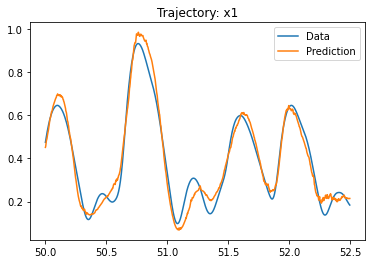

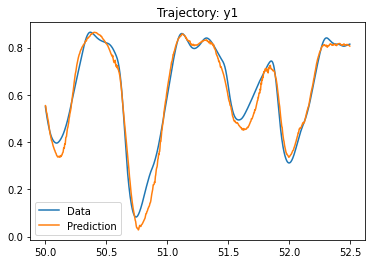

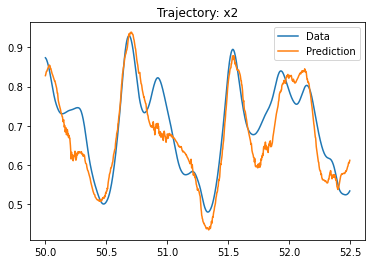

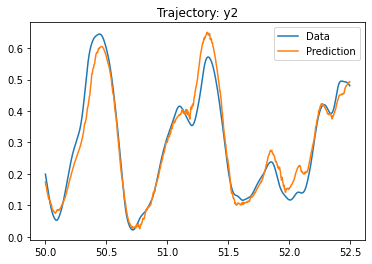

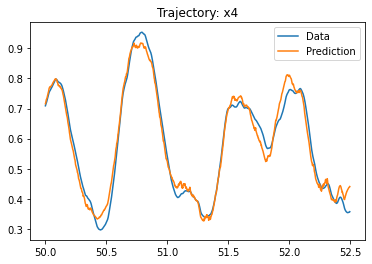

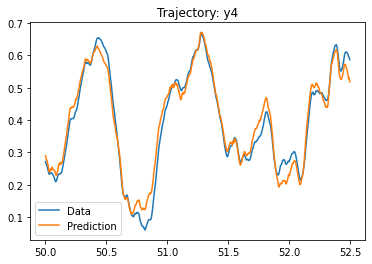

In [11]:
# Plot/Save Trajectory Comparison
pic_prefix = pic_dir + 'Comparison'

n_start = N_trn + int(10/dt)
n_end = n_start + 1000
t_plot = dt*np.arange(n_start,n_end)

model.plot_comparison((in_mat,pos_mat,t_all),n_start,n_end, save=pic_prefix)

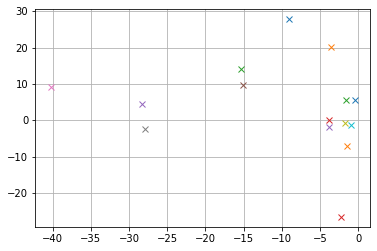

In [7]:
# Plot eigenvalues

model.plot_eigs()

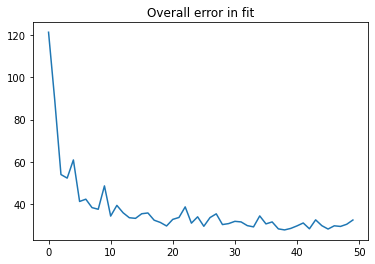

In [8]:
# Plot error

model.plot_error()

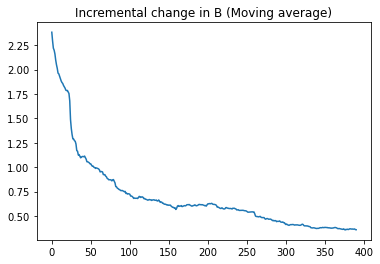

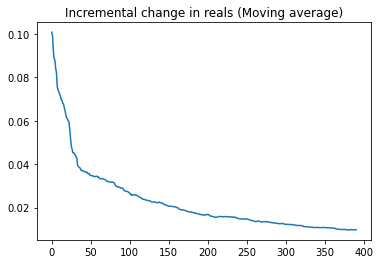

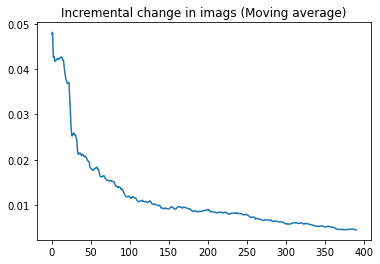

In [9]:
# Plot Incremental changes

model.plot_changes(start = 10)

In [10]:
# Save model
modfile = model_dir+'model_3_9_21.sav'
pickle.dump(model, open(modfile, 'wb'))

In [12]:
# Load model
modfile = model_dir+'model_3_9_21.sav'
model = pickle.load(open(modfile, 'rb'))